In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fake_reviews_dataset.csv')
df.head()

,category,rating,text,label
0,Home_and_Kitchen,5.0,"Love this! Well made, sturdy, and very comfor...",1
1,Home_and_Kitchen,5.0,"love it, a great upgrade from the original. I...",1
2,Home_and_Kitchen,5.0,This pillow saved my back. I love the look and...,1
3,Home_and_Kitchen,1.0,"Missing information on how to use it, but it i...",1
4,Home_and_Kitchen,5.0,Very nice set. Good quality. We have had the s...,1


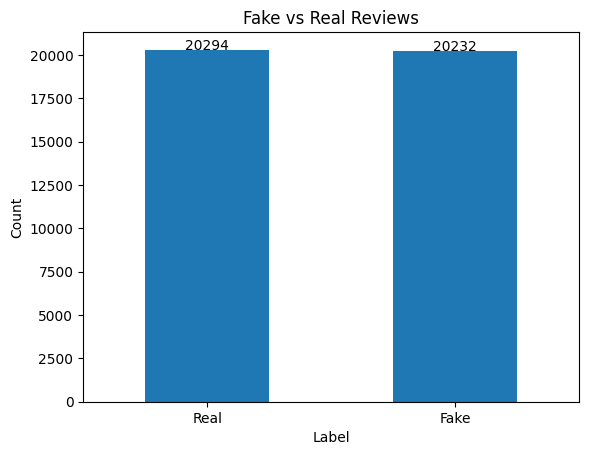

In [5]:
import matplotlib.pyplot as plt

# Getting number of fake vs real reviews
counts = df['label'].value_counts()

# Plot
ax = counts.plot(kind='bar')
plt.title('Fake vs Real Reviews')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Real', 'Fake'], rotation=0)

# Add counts on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

plt.show()

In [7]:
# checking for missing values
print(df.isnull().sum())

category    0
rating      0
text        0
label       0
dtype: int64


                      category  label  count
0                   Automotive      0      2
1                   Automotive      1      7
2                       Beauty      0      2
3                       Beauty      1      7
4                        Books      0   2187
5                        Books      1   2192
6                     Clothing      0      2
7                     Clothing      1      7
8   Clothing_Shoes_and_Jewelry      0   1924
9   Clothing_Shoes_and_Jewelry      1   1924
10                 Electronics      0   1994
11                 Electronics      1   2008
12                        Food      0      2
13                        Food      1      7
14                   Gardening      1      6
15             Home Appliances      0      2
16             Home Appliances      1      9
17            Home_and_Kitchen      0   2028
18            Home_and_Kitchen      1   2028
19                Kindle_Store      0   2365
20                Kindle_Store      1   2365
21        

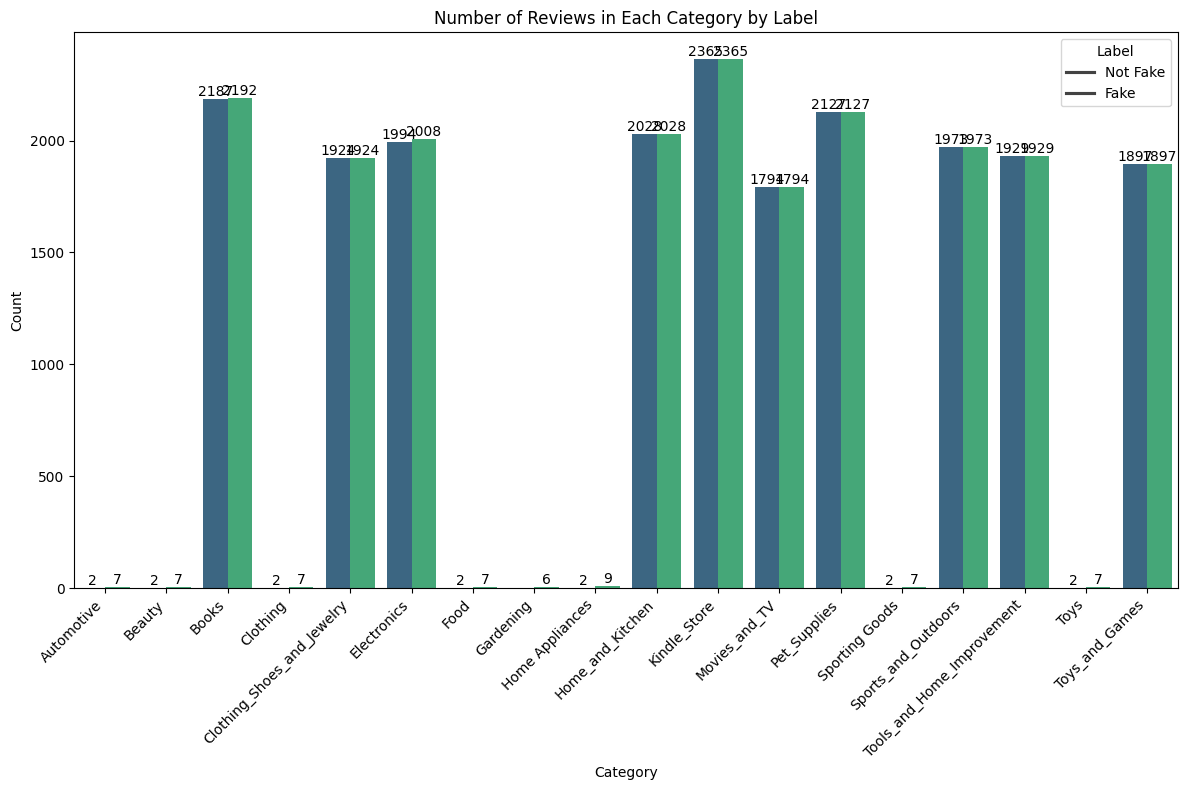

In [50]:
# Get number of reviews in each category for real and fake reviews
# Group by category and label, then count the number of reviews
category_counts = df.groupby(['category', 'label']).size().reset_index(name='count')

# Display the counts
print(category_counts)

# Visualize the counts using a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='category', y='count', hue='label', data=category_counts, palette='viridis')
plt.title('Number of Reviews in Each Category by Label')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label', labels=['Not Fake', 'Fake'])

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

In [28]:
# Getting frequency of words in the reviews for each label
def get_word_frequency(df, label):
    text = ' '.join(df[df['label'] == label]['text'])
    words = text.split()
    word_freq = pd.Series(words).value_counts()
    return word_freq

# Getting word frequency for fake reviews
fake_word_freq = get_word_frequency(df, 1)
# Getting word frequency for real reviews
real_word_freq = get_word_frequency(df, 0)

print("Fake Review Word Frequency:")
print(fake_word_freq.head(10))
print("\nReal Review Word Frequency:")
print(real_word_freq.head(10))

Fake Review Word Frequency:
the     61917
I       56673
a       56386
and     43086
is      40258
to      30437
it      24274
The     21610
this    20553
of      20291
Name: count, dtype: int64

Real Review Word Frequency:
the    63510
and    43015
I      38581
a      38547
to     37330
of     24825
is     23746
it     21400
for    17590
in     17283
Name: count, dtype: int64


- Seems to all be stopwords so I will do this again later but after I remove the stop words.

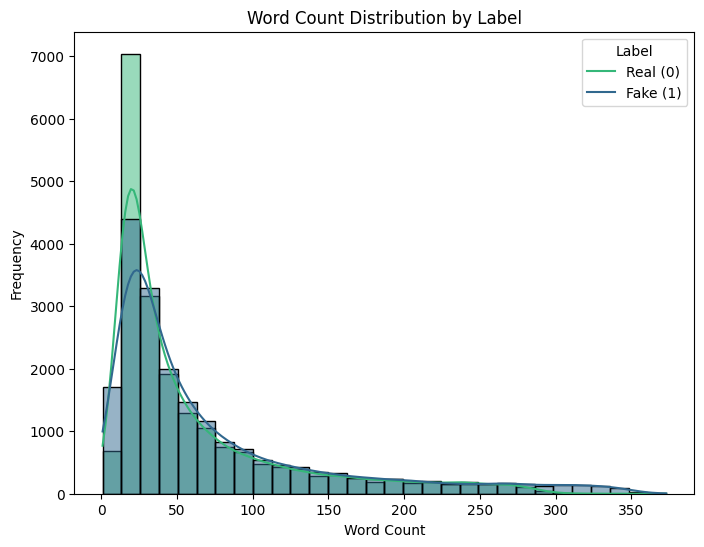

In [8]:
# Distribution of word count for each label
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='word_count', hue='label', bins=30, kde=True, palette='viridis')

# Update legend labels
plt.legend(title='Label', labels=['Real (0)', 'Fake (1)'])

plt.title('Word Count Distribution by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Get summary stats for word count for each label
fake_word_count_stats = df[df['label'] == 1]['word_count'].describe()
real_word_count_stats = df[df['label'] == 0]['word_count'].describe()
print("Fake Review Word Count Stats:")
print(fake_word_count_stats)
print("\nReal Review Word Count Stats:")
print(real_word_count_stats)

Fake Review Word Count Stats:
count    20294.000000
mean        61.108505
std         61.748117
min          1.000000
25%         19.000000
50%         35.000000
75%         77.000000
max        318.000000
Name: word_count, dtype: float64

Real Review Word Count Stats:
count    20232.000000
mean        73.593318
std         76.068537
min          5.000000
25%         23.000000
50%         42.000000
75%         93.000000
max        373.000000
Name: word_count, dtype: float64


We see that word count for fake reviews seems to be less?

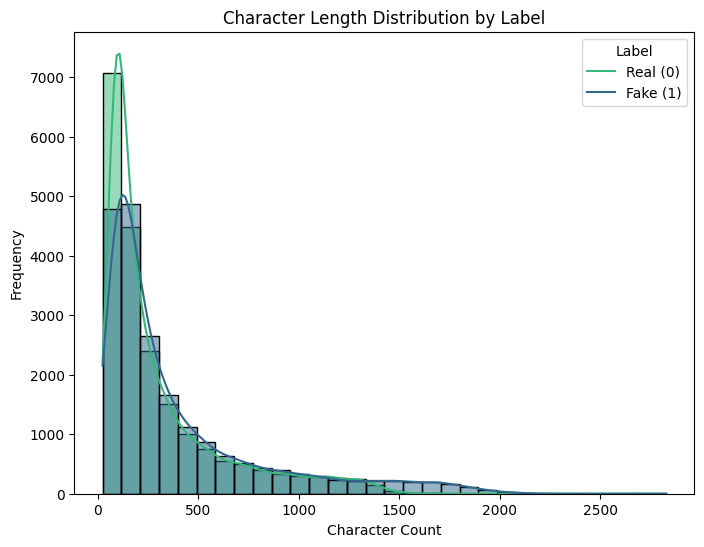

In [9]:
# Character length distribution for each label
df['char_count'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='char_count', hue='label', bins=30, kde=True, palette='viridis')

# Update legend labels
plt.legend(title='Label', labels=['Real (0)', 'Fake (1)'])

plt.title('Character Length Distribution by Label')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Get summary stats for character count for each label
fake_char_count_stats = df[df['label'] == 1]['char_count'].describe()
real_char_count_stats = df[df['label'] == 0]['char_count'].describe()

print("Fake Review Character Count Stats:")
print(fake_char_count_stats)
print("\nReal Review Character Count Stats:")
print(real_char_count_stats)

Fake Review Character Count Stats:
count    20294.000000
mean       304.716517
std        306.758635
min         24.000000
25%         95.000000
50%        174.000000
75%        381.000000
max       1717.000000
Name: char_count, dtype: float64

Real Review Character Count Stats:
count    20232.000000
mean       396.708383
std        418.366420
min         28.000000
25%        121.000000
50%        224.000000
75%        498.000000
max       2827.000000
Name: char_count, dtype: float64


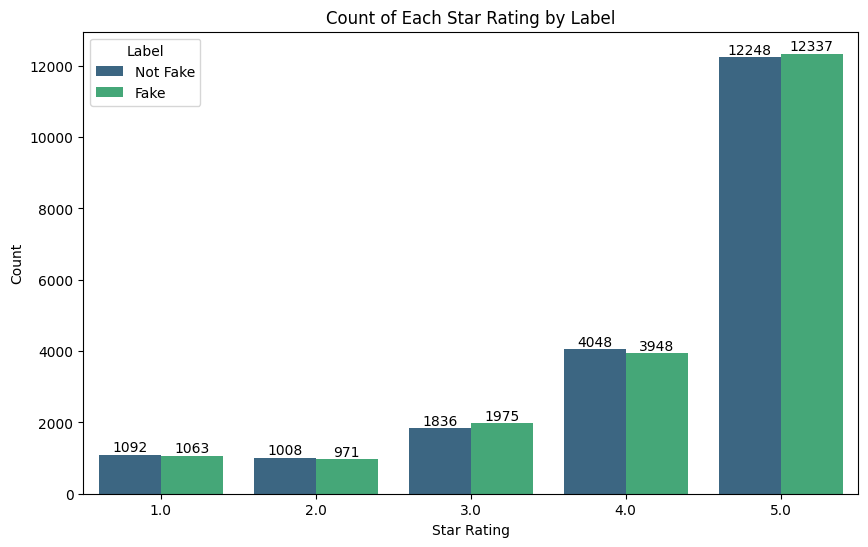

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating', hue='label', data=df, palette='viridis')
plt.title('Count of Each Star Rating by Label')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Not Fake', 'Fake'])

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.show()

In [31]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Getting frequency of words in the reviews for each label after removing stop words
def get_word_frequency(df, label):
    text = ' '.join(df[df['label'] == label]['text'])
    words = text.split()
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    word_freq = pd.Series(filtered_words).value_counts()
    return word_freq

# Getting word frequency for fake reviews
fake_word_freq = get_word_frequency(df, 1)
# Getting word frequency for real reviews
real_word_freq = get_word_frequency(df, 0)

print("Fake Review Word Frequency (Without Stop Words):")
print(fake_word_freq.head(10))
print("\nReal Review Word Frequency (Without Stop Words):")
print(real_word_freq.head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fake Review Word Frequency (Without Stop Words):
good         6423
book         6371
love         6249
great        6101
would        6001
it.          5360
little       5278
story        5019
well         4901
recommend    4729
Name: count, dtype: int64

Real Review Word Frequency (Without Stop Words):
one       5324
like      4885
would     4050
book      3619
great     3557
good      3520
get       3375
really    3241
love      2993
it.       2908
Name: count, dtype: int64


- After removing stop words, still cant tell much from this.
- Now I will try stemming too

In [33]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

# Load stop words
stop_words = set(stopwords.words('english'))

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Getting frequency of words in the reviews for each label after removing stop words and applying stemming
def get_word_frequency(df, label):
    # Combine all text for the given label
    text = ' '.join(df[df['label'] == label]['text'])
    words = text.split()
    # Remove stop words and apply stemming
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    # Calculate word frequencies
    word_freq = pd.Series(filtered_words).value_counts()
    return word_freq

# Getting word frequency for fake reviews (label 1)
fake_word_freq = get_word_frequency(df, 1)
# Getting word frequency for real reviews (label 0)
real_word_freq = get_word_frequency(df, 0)

print("Fake Review Word Frequency (Without Stop Words and With Stemming):")
print(fake_word_freq.head(10))
print("\nReal Review Word Frequency (Without Stop Words and With Stemming):")
print(real_word_freq.head(10))

Fake Review Word Frequency (Without Stop Words and With Stemming):
love     12498
great     7651
book      7243
good      6676
like      6324
would     6029
use       5801
read      5575
it.       5369
littl     5302
Name: count, dtype: int64

Real Review Word Frequency (Without Stop Words and With Stemming):
one      6231
like     6033
love     5964
use      5422
get      4747
great    4719
book     4500
would    4276
good     4061
work     3833
Name: count, dtype: int64


- From this, we see that love, great, good are much more frequent in fake reviews.

### LSTM

In [36]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load stop words and initialize stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing function: remove stop words and apply stemming
def preprocess_text(text):
    words = text.split()
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Preprocess the text column
df['text'] = df['text'].apply(preprocess_text)

# Split the data into training and testing sets
X = df['text']  # Features (text data)
y = df['label']  # Labels (1 for fake, 0 for real)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 100      # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build the deep learning model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

# Example: Predict if a new review is fake or real
def predict_review(review):
    preprocessed_review = preprocess_text(review)
    review_seq = tokenizer.texts_to_sequences([preprocessed_review])
    review_pad = pad_sequences(review_seq, maxlen=max_len, padding='post')
    prediction = model.predict(review_pad)
    return "Fake Review" if prediction[0] > 0.5 else "Real Review"

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


811/811 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.5223 - loss: 0.6928 - val_accuracy: 0.5202 - val_loss: 0.6699
Epoch 2/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.5604 - loss: 0.6475 - val_accuracy: 0.8637 - val_loss: 0.3210
Epoch 3/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.8887 - loss: 0.2969 - val_accuracy: 0.8828 - val_loss: 0.2692
Epoch 4/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9366 - loss: 0.1820 - val_accuracy: 0.8870 - val_loss: 0.2832
Epoch 5/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.9575 - loss: 0.1239 - val_accuracy: 0.8866 - val_loss: 0.3148
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8913 - loss: 0.3060
Test Accuracy: 0.8909449577331543
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction for new review: Real Review


In [37]:
# Test the prediction function
new_review = "I think this prodct is very useful. I used it when I was at home in my Chicago apartment and it worked as advertisd. No complaints."
print("Prediction for new review:", predict_review(new_review))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction for new review: Real Review


In [49]:
# Test the prediction function with fake review
new_review = "I love this product! It works great and I would recommend it to everyone!"
print("Prediction for new review:", predict_review(new_review))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction for new review: Fake Review


### Bidirectional LSTM

In [52]:
from tensorflow.keras.layers import Bidirectional

# Build the Bidirectional LSTM model
bilstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bidirectional LSTM model
print("Training Bidirectional LSTM...")
bilstm_history = bilstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the Bidirectional LSTM model
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test_pad, y_test)
print("Bidirectional LSTM Test Accuracy:", bilstm_accuracy)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training Bidirectional LSTM...
Epoch 1/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 73s 87ms/step - accuracy: 0.7576 - loss: 0.4519 - val_accuracy: 0.9039 - val_loss: 0.2276
Epoch 2/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9317 - loss: 0.1760 - val_accuracy: 0.9058 - val_loss: 0.2199
Epoch 3/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9591 - loss: 0.1136 - val_accuracy: 0.9044 - val_loss: 0.2786
Epoch 4/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 73s 90ms/step - accuracy: 0.9732 - loss: 0.0747 - val_accuracy: 0.9033 - val_loss: 0.2975
Epoch 5/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9803 - loss: 0.0551 - val_accuracy: 0.9002 - val_loss: 0.3631
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8984 - loss: 0.4085
Bidirectional LSTM Test Accuracy: 0.9013077020645142


### GRU

In [53]:
from tensorflow.keras.layers import GRU

# Build the GRU model
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the GRU model
print("Training GRU...")
gru_history = gru_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_pad, y_test)
print("GRU Test Accuracy:", gru_accuracy)

Training GRU...
Epoch 1/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.5120 - loss: 0.6914 - val_accuracy: 0.5014 - val_loss: 0.6692
Epoch 2/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6199 - loss: 0.5960 - val_accuracy: 0.8708 - val_loss: 0.2983
Epoch 3/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.9055 - loss: 0.2405 - val_accuracy: 0.8879 - val_loss: 0.2560
Epoch 4/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.9392 - loss: 0.1599 - val_accuracy: 0.8825 - val_loss: 0.3115
Epoch 5/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.9582 - loss: 0.1088 - val_accuracy: 0.8877 - val_loss: 0.3149
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8931 - loss: 0.3122
GRU Test Accuracy: 0.8929188251495361


### Bidirectional LSTM + GRU

In [55]:
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

# Build the hybrid model
hybrid_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM layer
    GRU(32, return_sequences=False),                 # GRU layer
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')                   # Binary classification
])

hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the hybrid model
print("Training Hybrid Model...")
hybrid_history = hybrid_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the hybrid model
hybrid_loss, hybrid_accuracy = hybrid_model.evaluate(X_test_pad, y_test)
print("Hybrid Model Test Accuracy:", hybrid_accuracy)

Training Hybrid Model...
Epoch 1/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 94s 112ms/step - accuracy: 0.5110 - loss: 0.6941 - val_accuracy: 0.5418 - val_loss: 0.6833
Epoch 2/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 95s 117ms/step - accuracy: 0.6400 - loss: 0.6143 - val_accuracy: 0.8564 - val_loss: 0.3179
Epoch 3/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 95s 117ms/step - accuracy: 0.8797 - loss: 0.2816 - val_accuracy: 0.8859 - val_loss: 0.2657
Epoch 4/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 96s 118ms/step - accuracy: 0.9251 - loss: 0.1824 - val_accuracy: 0.8705 - val_loss: 0.3046
Epoch 5/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 96s 119ms/step - accuracy: 0.9442 - loss: 0.1348 - val_accuracy: 0.8874 - val_loss: 0.2860
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8905 - loss: 0.2860
Hybrid Model Test Accuracy: 0.8927954435348511
